# CNN classification

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [21]:
test_meta = pd.read_csv('/Users/yimi/Desktop/Courses/UC_Davis/2021spring/STA208/208Project/archive/test.txt', header=None, delimiter = " ")
train_meta = pd.read_csv('/Users/yimi/Desktop/Courses/UC_Davis/2021spring/STA208/208Project/archive/train_update.csv', sep = ",")

In [22]:
test_meta.columns = ['patient_id', 'filename', 'class', 'data source' ]

In [23]:
type(test_meta), type(train_meta)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [24]:
train_meta.columns.values.tolist()

['Unnamed: 0', 'patient_id', 'filename', 'classes', 'data source']

In [25]:
train_meta = train_meta.drop(columns=['Unnamed: 0'])

In [26]:
train_meta.columns = ['patient_id', 'filename', 'classes', 'data source' ]
test_meta.columns = ['patient_id', 'filename', 'classes', 'data source' ]

In [27]:
train_meta.shape

(4316, 4)

In [28]:
test_meta.shape

(400, 4)

In [29]:
sum(train_meta['classes'] == 'positive'), sum(train_meta['classes'] == 'negative')

(2158, 2158)

In [30]:
train_path = '/Users/yimi/Desktop/Courses/UC_Davis/2021spring/STA208/208Project/archive/train/'
test_path = '/Users/yimi/Desktop/Courses/UC_Davis/2021spring/STA208/208Project/archive/test/'
img_height = 300
img_width = 300
batch_size = 64

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [32]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='binary',
      batch_size=batch_size
      )

Found 4315 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


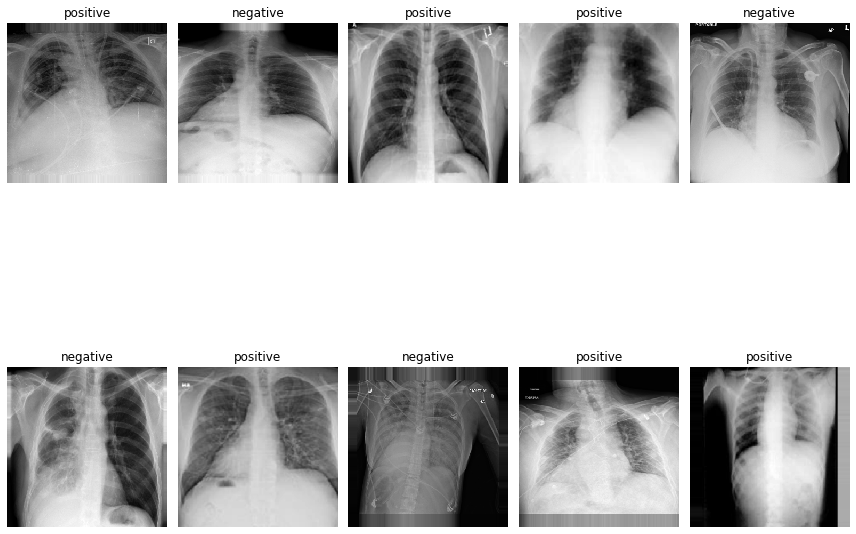

In [18]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'negative', 1:'positive'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
        
plt.tight_layout()
plt.show()

In [33]:
cnn = Sequential()

cnn.add(Conv2D(32, (5, 5), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (5, 5), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (5, 5), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (5, 5), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (5, 5), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

# Dense
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))

#
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
# early = EarlyStopping(monitor= "val_loss", mode="min", patience=3)
early = EarlyStopping(mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(patience = 2, verbose=1, factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [35]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.0002318034306907, 1: 0.9997683039851715}


/Users/yimi/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [36]:
cnn.fit(train,epochs=10, class_weight=cw, callbacks=callbacks_list)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/10
68/68 [==============================] - 971s 14s/step - loss: 0.6868 - accuracy: 0.5251
Epoch 2/10
68/68 [==============================] - 821s 12s/step - loss: 0.6235 - accuracy: 0.6589
Epoch 3/10
68/68 [==============================] - 844s 12s/step - loss: 0.6033 - accuracy: 0.6976
Epoch 4/10
68/68 [==============================] - 921s 14s/step - loss: 0.5593 - accuracy: 0.7268
Epoch 5/10
68/68 [==============================] - 883s 13s/step - loss: 0.5084 - accuracy: 0.7539
Epoch 6/10
68/68 [==============================] - 939s 14s/step - loss: 0.4774 - accuracy: 0.7798
Epoch 7/10
68/68 [==============================] - 906s 13s/step - loss: 0.4587 - accuracy: 0.7942
Epoch 8/10
68/68 [==============================] - 790s 11s/step - loss: 0.4089 - accuracy: 0.8206
Epoch 9/10
68/68 [==============================] - 745s 11s/s

In [19]:
# pd.DataFrame(cnn.history.history).plot()

In [37]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

7/7 [==============================] - 36s 5s/step - loss: 0.3418 - accuracy: 0.8550
The testing accuracy is : 85.50000190734863 %


In [38]:
preds = cnn.predict(test,verbose=1)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

7/7 [==============================] - 38s 5s/step


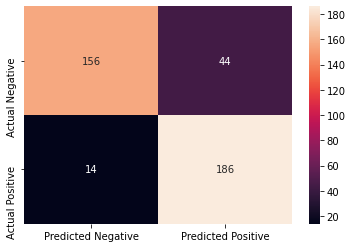

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Negative", "Actual Positive"],
columns=["Predicted Negative", "Predicted Positive"])
import seaborn as sns
sns_plot = sns.heatmap(cm,annot=True,fmt="d")
fig = sns_plot.get_figure()
fig.savefig('/Users/yimi/Desktop/Courses/UC_Davis/2021spring/STA208/208Project/batch64-filter.png')

In [40]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 296, 296, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 68, 68, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        2